In [5]:
print("""
@Description: 算法
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-08-21 09:40:26
""")


@Description: 算法
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-08-21 09:40:26



## 质数

### Python

In [6]:
def is_prime(I):
    if I % 2 == 0:
        return False
    for i in range(3, int(I ** .5) + 1, 2):
        if I % i == 0:
            return False
    return True

In [7]:
n = int(1e8 + 3)
n

100000003

In [8]:
%time is_prime(n)

CPU times: total: 0 ns
Wall time: 0 ns


False

In [9]:
p1 = int(1e8 + 7)
%time is_prime(p1)

CPU times: total: 0 ns
Wall time: 0 ns


True

In [10]:
p2 = 100109100129162907
p2.bit_length()

57

In [11]:
%time is_prime(p2)

CPU times: total: 9.69 s
Wall time: 9.97 s


True

### Numba

In [12]:
import numba
is_prime_nb = numba.jit(is_prime)

In [13]:
%time is_prime_nb(n)
# 第一次调用 is_prime_nb() 涉及编译开销

CPU times: total: 156 ms
Wall time: 300 ms


False

In [14]:
%time is_prime_nb(n)

CPU times: total: 0 ns
Wall time: 0 ns


False

In [15]:
%time is_prime_nb(p2)

CPU times: total: 250 ms
Wall time: 274 ms


True

### Cython

In [16]:
%load_ext Cython

In [17]:
%%cython -a

def is_prime_cy1(I):
    if I % 2 == 0: return False
    for i in range(3, int(I ** .5) + 1, 2):
        if I % i == 0:
            return False
    return True

In [18]:
%timeit is_prime(p1)

250 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
%timeit is_prime_cy1(p1)

122 µs ± 1.87 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [20]:
%%cython
def is_prime_cy2(long I):
    cdef long i
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [21]:
%timeit is_prime_cy2(p1)

8.12 µs ± 49.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [22]:
%timeit is_prime_nb(p1)

8.94 µs ± 47.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [23]:
%time is_prime_nb(p1)

CPU times: total: 0 ns
Wall time: 0 ns


True

In [24]:
%time is_prime_cy2(p1)

CPU times: total: 0 ns
Wall time: 0 ns


True

### 多进程

In [3]:
import multiprocessing as mp
pool = mp.Pool(processes=4)

In [ ]:
%time pool.map(is_prime, 10 * [p1])

In [25]:
%time pool.map(is_prime_nb, 10 * [p2])

CPU times: total: 0 ns
Wall time: 2.3 s


[True, True, True, True, True, True, True, True, True, True]

In [26]:
%time pool.map(is_prime_cy2, 10 * [p2])

## 斐波拉契数

### 递归算法

In [83]:
def fib_rec_py1(n):
    if n < 2:
        return n
    else:
        return fib_rec_py1(n - 1) + fib_rec_py1(n - 2)

In [2]:
%time fib_rec_py1(35)

CPU times: total: 2.3 s
Wall time: 2.44 s


9227465

In [6]:
fib_rec_nb = numba.jit(fib_rec_py1, forceobj=True)

In [15]:
%time fib_rec_nb(35)

CPU times: total: 2.23 s
Wall time: 2.4 s


9227465

In [18]:
%%cython
def fib_rec_cy(int n):
    if n < 2:
        return n
    else:
        return fib_rec_cy(n - 1) + fib_rec_cy(n -2)

In [19]:
%time fib_rec_cy(35)

CPU times: total: 453 ms
Wall time: 560 ms


9227465

递归算法的主要问题是中间结果不会缓存，而是重新计算。为了避免出现这种特有的问题，可以使用一个装饰器来负责缓存中间结果。它可以将执行速度提高好几个数量级：

In [20]:
from functools import lru_cache as cache
@cache(maxsize=None)
def fib_rec_py2(n):
    if n < 2:
        return n
    else:
        return fib_rec_py2(n - 1) + fib_rec_py2(n - 2)

In [21]:
%time fib_rec_py2(35)

CPU times: total: 0 ns
Wall time: 0 ns


9227465

In [23]:
%time fib_rec_py2(80)

CPU times: total: 0 ns
Wall time: 0 ns


23416728348467685

### 循环（迭代）算法

In [24]:
def fib_it_py(n):
    x, y = 0, 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [25]:
%time fib_it_py(80)

CPU times: total: 0 ns
Wall time: 0 ns


23416728348467685

In [26]:
fib_it_nb = numba.jit(fib_it_py)

In [27]:
%time fib_it_nb(80)

CPU times: total: 109 ms
Wall time: 193 ms


23416728348467685

In [28]:
%%cython
def fib_it_cy1(int n):
    cdef long i
    cdef long x = 0, y = 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [43]:
%time fib_it_cy1(80)
# 溢出了❌

CPU times: total: 0 ns
Wall time: 0 ns


-285007387

In [44]:
%%time
fn = fib_rec_py2(150)
print(fn)

9969216677189303386214405760200
CPU times: total: 0 ns
Wall time: 0 ns


In [33]:
fn.bit_length()

103

In [48]:
%%time
fn = fib_it_nb(150)
print(fn)
# 结果不对❌

6792540214324356296
CPU times: total: 0 ns
Wall time: 0 ns


In [49]:
fn.bit_length()

63

In [50]:
%%time
fn = fib_it_cy1(150)
print(fn)

626779336
CPU times: total: 0 ns
Wall time: 996 µs


In [51]:
fn.bit_length()

30

In [80]:
%%cython
cdef extern from *:
    ctypedef int int128 '__int128_t'
def fib_it_cy2(int n):
    cdef int128 i
    cdef int128 x = 0, y = 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x
fn = fib_it_cy2(150)
print(fn)

In [81]:
print(fn)

626779336


In [85]:
fib_rec_py1(35)

9227465

### $\pi$

In [90]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
rn = [(random.random() * 2 - 1, random.random() * 2 - 1) for _ in range(500)]

In [109]:
rn = np.array(rn)
rn[:5]

array([[ 0.4985679 , -0.17824091],
       [-0.29552178,  0.38483349],
       [ 0.52776662, -0.71255252],
       [ 0.01224475, -0.00356012],
       [ 0.05773168,  0.46866772]])

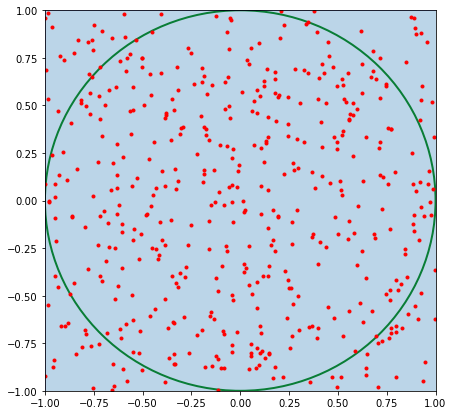

In [110]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='g', lw=2.0, facecolor='None')
box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=.3)
ax.add_patch(circ)
ax.add_patch(box)
ax.plot(rn[:, 0], rn[:, 1], 'r.')
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
plt.axis([-1, 1, -1, 1])
plt.show()

In [111]:
n = int(1e7)

In [112]:
%time rn = np.random.random((n, 2)) * 2 - 1

CPU times: total: 516 ms
Wall time: 678 ms


In [113]:
rn.nbytes

160000000